# Preprocessing for clinical data
Largely adapted from the [Multisurv model clinical preprocessing](https://github.com/luisvalesilva/multisurv/blob/master/data/preprocess_clinical.ipynb)

In [306]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [307]:
gene_expression_data = 'data/data_mrna_illumina_microarray.txt'
cna_data = 'data/data_cna.txt'
clinical_data = 'data/data_clinical_patient.txt'

In [308]:
results_dir = Path('./results')
results_dir.mkdir(parents=True, exist_ok=True)

### 1.1. Exploring data

In [309]:
gene_exp_df = pd.read_table(gene_expression_data, sep='\t')
gene_exp_df.shape

(20603, 1982)

In [310]:
gene_exp_df.head()

,Hugo_Symbol,Entrez_Gene_Id,MB-0362,MB-0346,MB-0386,MB-0574,MB-0185,MB-0503,MB-0641,MB-0201,...,MB-6192,MB-4820,MB-5527,MB-5167,MB-5465,MB-5453,MB-5471,MB-5127,MB-4313,MB-4823
0,RERE,473,8.676978,9.653589,9.033589,8.814855,8.736406,9.274265,9.286585,8.437347,...,8.804947,9.991215,9.595923,9.637249,8.131637,9.606915,9.049296,8.858622,8.415867,9.902776
1,RNF165,494470,6.075331,6.687887,5.910885,5.628740,6.392422,5.908698,6.206729,6.095592,...,5.601472,7.103160,6.418987,6.203370,9.101942,7.427494,6.850000,6.550450,6.831722,7.338318
2,PHF7,51533,5.838270,5.600876,6.030718,5.849428,5.542133,5.964661,5.783374,5.737572,...,5.922894,6.181493,5.992153,6.230316,5.644587,5.927409,6.117095,5.936371,7.408960,5.875759
3,CIDEA,1149,6.397503,5.246319,10.111816,6.116868,5.184098,7.828171,8.744149,5.480091,...,6.488136,5.612846,6.241160,5.560488,5.611189,5.927031,6.374305,5.963092,9.181768,5.596873
4,TENT2,167153,7.906217,8.267256,7.959291,9.206376,8.162845,8.706646,8.518929,7.478413,...,8.534527,8.203819,8.813103,8.612911,7.798269,8.520545,8.499637,9.320207,6.804085,8.436732


In [311]:
cna_df = pd.read_table(cna_data, sep='\t')
cna_df.shape

(22544, 2175)

In [312]:
clinical_df.head()

,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Overall Survival (Months),Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status (Months),Label,group
#Patient Identifier,,,,,,,,,,,,,,,,,,,,
MB-7014,1,5.038,High,NO,Positve,NEUTRAL,YES,Post,1,67.57,68.7,Basal,ER+/HER2- High Prolif,Left,YES,Mixed,BREAST CONSERVING,67.8,0,train
MB-5549,2,4.04,Moderate,YES,Negative,GAIN,NO,Post,1,54.83,88.93333333,Her2,ER-/HER2-,Left,YES,Ductal/NST,BREAST CONSERVING,67.93,0,train
MB-6030,0,2.04,High,NO,Positve,NEUTRAL,YES,Post,7,66.76,145.3666667,LumA,ER+/HER2- Low Prolif,Left,NO,Ductal/NST,MASTECTOMY,65,0,train
MB-7077,5,5.034,High,NO,Positve,NEUTRAL,YES,Pre,3,37.89,101.2666667,LumA,ER+/HER2- Low Prolif,Right,YES,Ductal/NST,BREAST CONSERVING,99.93,0,val
MB-3871,1,4.052,High,NO,Positve,NEUTRAL,YES,Post,8,62.03,172.8,LumA,ER+/HER2- Low Prolif,Left,NO,Ductal/NST,MASTECTOMY,170.53,0,train


In [313]:
clinical_df = pd.read_table(clinical_data, sep='\t')
clinical_df.shape

(2513, 24)

In [314]:
clinical_df.head()

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status,Relapse Free Status (Months)
0,#Identifier to uniquely specify a patient.,Number of lymphnodes positive,Nottingham prognostic index,Tumor Content,Chemotherapy.,Cohort.,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Overall patient survival status.,Pam50 + Claudin-low subtype,3-Gene classifier subtype,The survival state of the person.,"For tumors in paired organs, designates the si...",Radio Therapy,Text to describe a tumor's histologic subtype ...,Type of Breast Surgery,Relapse Free Status (Recurred = cases where th...,Time until last follow-up or relapse (in months)
1,#STRING,STRING,NUMBER,STRING,STRING,STRING,STRING,STRING,STRING,STRING,...,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,STRING,NUMBER
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,CELLULARITY,CHEMOTHERAPY,COHORT,ER_IHC,HER2_SNP6,HORMONE_THERAPY,INFERRED_MENOPAUSAL_STATE,...,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,RADIO_THERAPY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS
4,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY,0:Not Recurred,138.65


### 1.1. Dropping unnecessary rows and columns from clinical data

In [315]:
# Dropping unnecessary rows and columns
clinical_df = clinical_df.drop(clinical_df.index[:4]).reset_index() #headers
clinical_df = clinical_df.drop(clinical_df.columns[0],axis=1) #index column
clinical_df.head()

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,Cohort,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,...,Overall Survival Status,Pam50 + Claudin-low subtype,3-Gene classifier subtype,Patient's Vital Status,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status,Relapse Free Status (Months)
0,MB-0000,10,6.044,NaN,NO,1,Positve,NEUTRAL,YES,Post,...,0:LIVING,claudin-low,ER-/HER2-,Living,Right,YES,Ductal/NST,MASTECTOMY,0:Not Recurred,138.65
1,MB-0002,0,4.02,High,NO,1,Positve,NEUTRAL,YES,Pre,...,0:LIVING,LumA,ER+/HER2- High Prolif,Living,Right,YES,Ductal/NST,BREAST CONSERVING,0:Not Recurred,83.52
2,MB-0005,1,4.03,High,YES,1,Positve,NEUTRAL,YES,Pre,...,1:DECEASED,LumB,NaN,Died of Disease,Right,NO,Ductal/NST,MASTECTOMY,1:Recurred,151.28
3,MB-0006,3,4.05,Moderate,YES,1,Positve,NEUTRAL,YES,Pre,...,0:LIVING,LumB,NaN,Living,Right,YES,Mixed,MASTECTOMY,0:Not Recurred,162.76
4,MB-0008,8,6.08,High,YES,1,Positve,NEUTRAL,YES,Post,...,1:DECEASED,LumB,ER+/HER2- High Prolif,Died of Disease,Right,YES,Mixed,MASTECTOMY,1:Recurred,18.55


### 1.2 Selecting patients that have all 3 data types: gene expression, CNA, clinical

In [316]:
gene_exp_patients = set(gene_exp_df.columns[2:])
cna_patients = set(cna_df.columns[2:])
clinical_patients = set(clinical_df['#Patient Identifier'])

common_patients = gene_exp_patients.intersection(cna_patients, clinical_patients)

gene_exp_columns_to_drop = [col for col in gene_exp_df.columns[2:] if col not in common_patients]
gene_exp_df = gene_exp_df.drop(columns=gene_exp_columns_to_drop)

cna_columns_to_drop = [col for col in cna_df.columns[2:] if col not in common_patients]
cna_df = cna_df.drop(columns=cna_columns_to_drop)

clinical_df = clinical_df[clinical_df['#Patient Identifier'].isin(common_patients)]

In [317]:
gene_exp_df.shape

(20603, 1982)

In [318]:
cna_df.shape

(22544, 1982)

In [319]:
clinical_df.shape

(1980, 24)

### 1.3 Checking for missing clinical data

In [320]:
print('~~ PERCENTAGE OF MISSING DATA ~~')
print()

n = clinical_df.shape[0]

for col in clinical_df.columns:
    if col == '#Patient Identifier':
        continue

    n_levels = len(clinical_df[col].value_counts())
    
    if n_levels == n:
        clinical_df = clinical_df.drop(columns=[col])
    else:
        n_missing = sum(clinical_df[col].isnull())
        if n_missing > 0:
            if n_missing == n:
                clinical_df = clinical_df.drop(columns=[col])
            else:
                print(f'{col}: {n_missing} ({round(n_missing / n * 100, 2)}%)')

~~ PERCENTAGE OF MISSING DATA ~~

Lymph nodes examined positive: 76 (3.84%)
Cellularity: 63 (3.18%)
ER status measured by IHC: 43 (2.17%)
3-Gene classifier subtype: 216 (10.91%)
Patient's Vital Status: 1 (0.05%)
Primary Tumor Laterality: 110 (5.56%)
Tumor Other Histologic Subtype: 44 (2.22%)
Type of Breast Surgery: 25 (1.26%)
Relapse Free Status: 1 (0.05%)


In [321]:
clinical_df.shape

(1980, 24)

In [322]:
# Making sure all patients are female
clinical_df['Sex'].value_counts()

Sex
Female    1980
Name: count, dtype: int64

### 1.4. Selecting clinical features
For now selecting most of the features, but can fine tune later based on cancer subtypes

In [323]:
clinical_df.columns

Index(['#Patient Identifier', 'Lymph nodes examined positive',
       'Nottingham prognostic index', 'Cellularity', 'Chemotherapy', 'Cohort',
       'ER status measured by IHC', 'HER2 status measured by SNP6',
       'Hormone Therapy', 'Inferred Menopausal State', 'Sex',
       'Integrative Cluster', 'Age at Diagnosis', 'Overall Survival (Months)',
       'Overall Survival Status', 'Pam50 + Claudin-low subtype',
       '3-Gene classifier subtype', 'Patient's Vital Status',
       'Primary Tumor Laterality', 'Radio Therapy',
       'Tumor Other Histologic Subtype', 'Type of Breast Surgery',
       'Relapse Free Status', 'Relapse Free Status (Months)'],
      dtype='object')

In [324]:
# Selecting variables
label_cols = ['#Patient Identifier', 'Overall Survival (Months)']
keep_cols = ['Lymph nodes examined positive', 'Nottingham prognostic index', 'Cellularity', 'Chemotherapy','ER status measured by IHC',
            'HER2 status measured by SNP6', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Age at Diagnosis', 
             'Pam50 + Claudin-low subtype','3-Gene classifier subtype', 'Primary Tumor Laterality', 'Tumor Other Histologic Subtype',  
             'Radio Therapy','Type of Breast Surgery', 'Relapse Free Status (Months)']
columns_to_drop = [col for col in clinical_df.columns if col not in label_cols + keep_cols]
clinical_df = clinical_df.drop(columns=columns_to_drop)
clinical_df.head()

,#Patient Identifier,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Overall Survival (Months),Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status (Months)
0,MB-0000,10,6.044,NaN,NO,Positve,NEUTRAL,YES,Post,4ER+,75.65,140.5,claudin-low,ER-/HER2-,Right,YES,Ductal/NST,MASTECTOMY,138.65
1,MB-0002,0,4.02,High,NO,Positve,NEUTRAL,YES,Pre,4ER+,43.19,84.63333333,LumA,ER+/HER2- High Prolif,Right,YES,Ductal/NST,BREAST CONSERVING,83.52
2,MB-0005,1,4.03,High,YES,Positve,NEUTRAL,YES,Pre,3,48.87,163.7,LumB,NaN,Right,NO,Ductal/NST,MASTECTOMY,151.28
3,MB-0006,3,4.05,Moderate,YES,Positve,NEUTRAL,YES,Pre,9,47.68,164.9333333,LumB,NaN,Right,YES,Mixed,MASTECTOMY,162.76
4,MB-0008,8,6.08,High,YES,Positve,NEUTRAL,YES,Post,9,76.97,41.36666667,LumB,ER+/HER2- High Prolif,Right,YES,Mixed,MASTECTOMY,18.55


### 1.5. Exploring feature distributions

In [325]:
clinical_df['Cellularity'].value_counts()

Cellularity
High        965
Moderate    737
Low         215
Name: count, dtype: int64

In [326]:
clinical_df['Chemotherapy'].value_counts()

Chemotherapy
NO     1568
YES     412
Name: count, dtype: int64

In [327]:
clinical_df['ER status measured by IHC'].value_counts()

ER status measured by IHC
Positve     1498
Negative     439
Name: count, dtype: int64

In [328]:
clinical_df['HER2 status measured by SNP6'].value_counts()

HER2 status measured by SNP6
NEUTRAL    1436
GAIN        438
LOSS        101
UNDEF         5
Name: count, dtype: int64

In [329]:
clinical_df['Hormone Therapy'].value_counts()

Hormone Therapy
YES    1216
NO      764
Name: count, dtype: int64

In [330]:
clinical_df['Inferred Menopausal State'].value_counts()

Inferred Menopausal State
Post    1556
Pre      424
Name: count, dtype: int64

In [331]:
clinical_df['Integrative Cluster'].value_counts()

Integrative Cluster
8       299
3       290
4ER+    260
10      226
7       190
5       190
9       146
1       139
6        85
4ER-     83
2        72
Name: count, dtype: int64

In [332]:
clinical_df['Pam50 + Claudin-low subtype'].value_counts()

Pam50 + Claudin-low subtype
LumA           700
LumB           475
Her2           224
claudin-low    218
Basal          209
Normal         148
NC               6
Name: count, dtype: int64

In [333]:
clinical_df['3-Gene classifier subtype'].value_counts()

3-Gene classifier subtype
ER+/HER2- Low Prolif     640
ER+/HER2- High Prolif    617
ER-/HER2-                309
HER2+                    198
Name: count, dtype: int64

In [334]:
clinical_df['Primary Tumor Laterality'].value_counts()

Primary Tumor Laterality
Left     973
Right    897
Name: count, dtype: int64

In [335]:
clinical_df['Radio Therapy'].value_counts()

Radio Therapy
YES    1173
NO      807
Name: count, dtype: int64

In [336]:
clinical_df['Tumor Other Histologic Subtype'].value_counts()

Tumor Other Histologic Subtype
Ductal/NST             1491
Mixed                   211
Lobular                 146
Medullary                25
Mucinous                 23
Tubular/ cribriform      21
Other                    17
Metaplastic               2
Name: count, dtype: int64

In [337]:
clinical_df['Type of Breast Surgery'].value_counts()

Type of Breast Surgery
MASTECTOMY           1170
BREAST CONSERVING     785
Name: count, dtype: int64

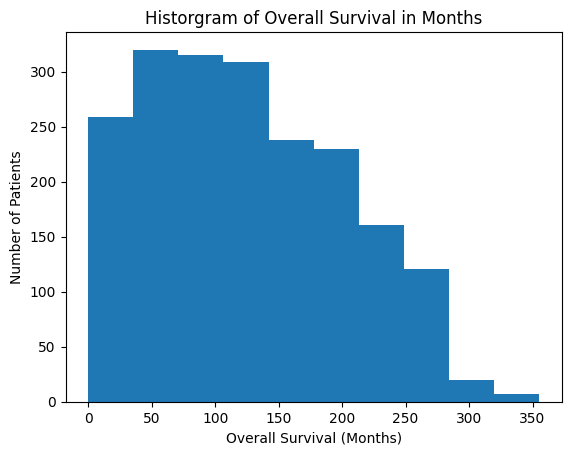

In [338]:
clinical_df['Overall Survival (Months)'].astype(float).plot(kind='hist', 
                                                            title = 'Historgram of Overall Survival in Months',
                                                            xlabel ='Overall Survival (Months)', 
                                                            ylabel = 'Number of Patients')
plt.savefig(results_dir/'survival_hist.png')

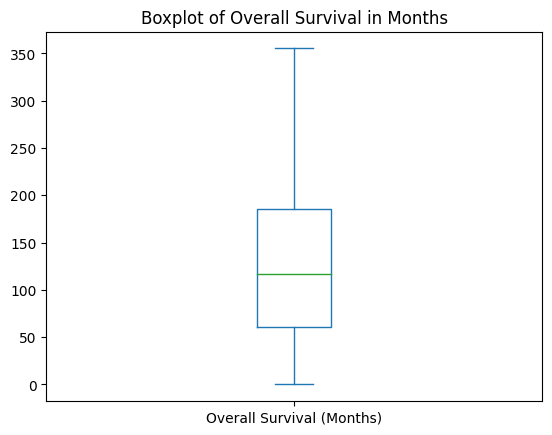

In [339]:
clinical_df['Overall Survival (Months)'].astype(float).plot(kind='box', 
                                                            title = 'Boxplot of Overall Survival in Months')
plt.savefig(results_dir/'survival_box.png')

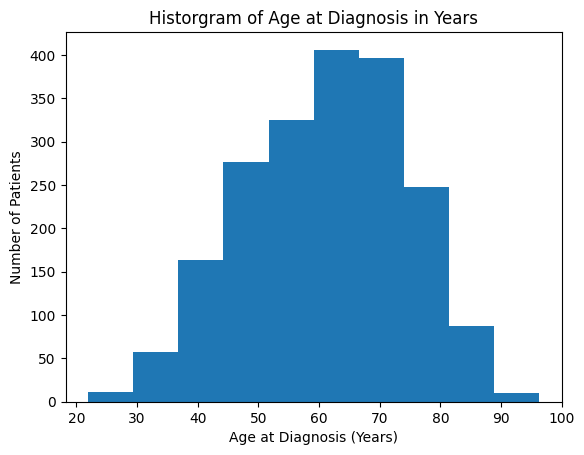

In [340]:
clinical_df['Age at Diagnosis'].astype(float).plot(kind='hist', 
                                                            title = 'Historgram of Age at Diagnosis in Years',
                                                            xlabel ='Age at Diagnosis (Years)', 
                                                            ylabel = 'Number of Patients')
plt.savefig(results_dir/'age_hist.png')

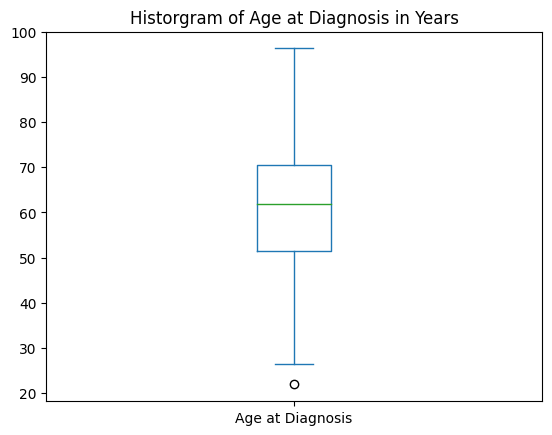

In [341]:
clinical_df['Age at Diagnosis'].astype(float).plot(kind='box', 
                                                    title = 'Historgram of Age at Diagnosis in Years')
plt.savefig(results_dir/'age_box.png')

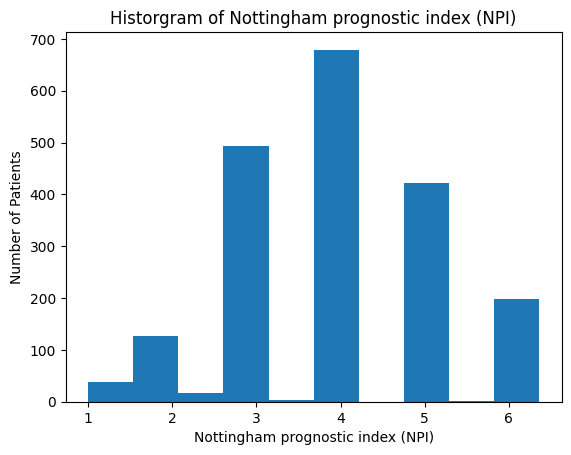

In [342]:
clinical_df['Nottingham prognostic index'].astype(float).plot(kind='hist', 
                                                            title = 'Historgram of Nottingham prognostic index (NPI)',
                                                            xlabel ='Nottingham prognostic index (NPI)', 
                                                            ylabel = 'Number of Patients')
plt.savefig(results_dir/'NPI_hist.png')

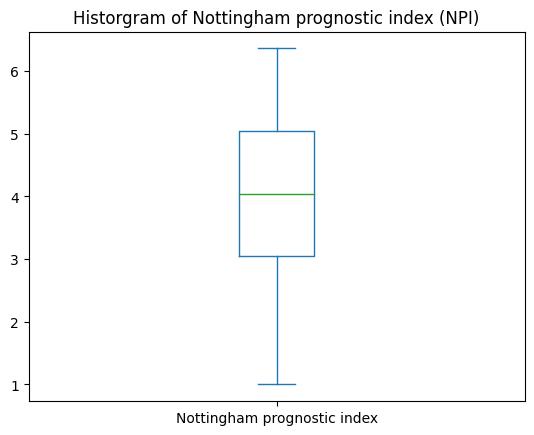

In [343]:
clinical_df['Nottingham prognostic index'].astype(float).plot(kind='box', 
                                                            title = 'Historgram of Nottingham prognostic index (NPI)')
plt.savefig(results_dir/'NPI_box.png')

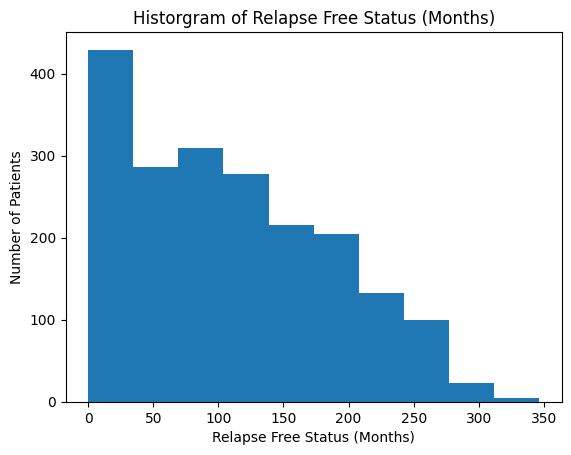

In [344]:
clinical_df['Relapse Free Status (Months)'].astype(float).plot(kind='hist', 
                                                            title = 'Historgram of Relapse Free Status (Months)',
                                                            xlabel ='Relapse Free Status (Months)', 
                                                            ylabel = 'Number of Patients')
plt.savefig(results_dir/'relapse_hist.png')

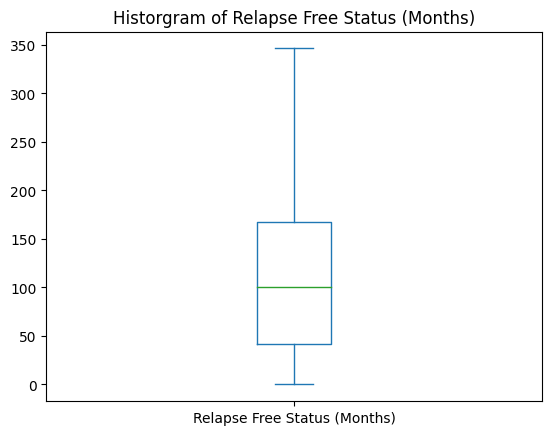

In [345]:
clinical_df['Relapse Free Status (Months)'].astype(float).plot(kind='box', 
                                                            title = 'Historgram of Relapse Free Status (Months)')
plt.savefig(results_dir/'relapse_box.png')

### 1.6. Checking if any patients have missing "Overall Survival (Months)" information

In [346]:
subset = ~clinical_df['Overall Survival (Months)'].isna()
clinical_df = clinical_df.loc[subset]
clinical_df.shape

(1980, 19)

### 1.7. Labeling data
L - 0, D - 1

In [347]:
clinical_df['Label'] = clinical_df["Overall Survival (Months)"].astype(float).apply(lambda x: 0 if x > 60 else 1)
#clinical_df = clinical_df.drop(columns = ["Overall Survival (Months)"])
clinical_df['Label'].value_counts()

Label
0    1489
1     491
Name: count, dtype: int64

In [348]:
# Because the counts in label categories are substantially different, decrease the L label to variable n
n = 500
L_sample_df = pd.DataFrame(clinical_df.loc[clinical_df['Label'] == 0].sample(n))
D_df = clinical_df.loc[clinical_df['Label'] == 1]
clinical_df = pd.concat([L_sample_df,D_df]).reset_index(drop=True)
clinical_df['Label'].value_counts()

Label
0    500
1    491
Name: count, dtype: int64

In [349]:
clinical_df.set_index('#Patient Identifier', inplace=True)
clinical_df.head()

,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Overall Survival (Months),Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status (Months),Label
#Patient Identifier,,,,,,,,,,,,,,,,,,,
MB-4283,2,4.08,Moderate,NO,Positve,NEUTRAL,YES,Post,8,55.62,174.8333333,LumA,ER+/HER2- Low Prolif,Left,YES,Ductal/NST,MASTECTOMY,172.53,0
MB-7079,1,4.06,Low,NO,Positve,NEUTRAL,YES,Post,4ER+,70.3,91.06666667,claudin-low,ER-/HER2-,Right,NO,Ductal/NST,MASTECTOMY,89.87,0
MB-6082,8,5.14,Low,YES,Negative,NEUTRAL,NO,Pre,7,46.47,102.5,Normal,ER+/HER2- Low Prolif,Right,NO,Ductal/NST,MASTECTOMY,101.15,0
MB-5064,0,3.04,High,NO,Positve,LOSS,NO,Post,4ER+,63.4,91.5,LumA,ER+/HER2- Low Prolif,Left,NO,Ductal/NST,MASTECTOMY,90.3,0
MB-0270,0,4.028,High,NO,Positve,NEUTRAL,NO,Pre,10,29.98,337.0333333,LumB,ER+/HER2- High Prolif,Left,NO,Ductal/NST,MASTECTOMY,139.64,0


### 1.8. Train-val-test split

In [350]:
train_val_data, test_data = train_test_split(clinical_df, test_size=0.15, stratify=clinical_df['Label'], random_state=42)
train_data, val_data = train_test_split(train_val_data, test_size=0.125, stratify=train_val_data['Label'], random_state=42)

In [351]:
train_data.shape

(736, 19)

In [352]:
val_data.shape

(106, 19)

In [353]:
test_data.shape

(149, 19)

In [354]:
def get_split_group(id_code):
    if id_code in list(train_data.index):
        return 'train'
    elif id_code in val_data.index:
        return 'val'
    elif id_code in test_data.index:
        return 'test'
    else:
        print('Found NaN!')

In [355]:
clinical_df['group'] = 'Missing'
clinical_df['group'] = [get_split_group(x) for x in list(clinical_df.index)]

In [356]:
clinical_df.head()

,Lymph nodes examined positive,Nottingham prognostic index,Cellularity,Chemotherapy,ER status measured by IHC,HER2 status measured by SNP6,Hormone Therapy,Inferred Menopausal State,Integrative Cluster,Age at Diagnosis,Overall Survival (Months),Pam50 + Claudin-low subtype,3-Gene classifier subtype,Primary Tumor Laterality,Radio Therapy,Tumor Other Histologic Subtype,Type of Breast Surgery,Relapse Free Status (Months),Label,group
#Patient Identifier,,,,,,,,,,,,,,,,,,,,
MB-4283,2,4.08,Moderate,NO,Positve,NEUTRAL,YES,Post,8,55.62,174.8333333,LumA,ER+/HER2- Low Prolif,Left,YES,Ductal/NST,MASTECTOMY,172.53,0,train
MB-7079,1,4.06,Low,NO,Positve,NEUTRAL,YES,Post,4ER+,70.3,91.06666667,claudin-low,ER-/HER2-,Right,NO,Ductal/NST,MASTECTOMY,89.87,0,train
MB-6082,8,5.14,Low,YES,Negative,NEUTRAL,NO,Pre,7,46.47,102.5,Normal,ER+/HER2- Low Prolif,Right,NO,Ductal/NST,MASTECTOMY,101.15,0,train
MB-5064,0,3.04,High,NO,Positve,LOSS,NO,Post,4ER+,63.4,91.5,LumA,ER+/HER2- Low Prolif,Left,NO,Ductal/NST,MASTECTOMY,90.3,0,val
MB-0270,0,4.028,High,NO,Positve,NEUTRAL,NO,Pre,10,29.98,337.0333333,LumB,ER+/HER2- High Prolif,Left,NO,Ductal/NST,MASTECTOMY,139.64,0,train


In [357]:
clinical_df.to_csv(results_dir/'preprocessed_clinical_data.csv')